In [ ]:
import scipy.io as sio
import pandas as pd
import numpy as np

imu_data = sio.loadmat('/content/imu.mat')
gps_data = sio.loadmat('/content/gnss.mat')

In [ ]:

imu_data_array = imu_data['IMU_meas']
gps_data_array = gps_data['GPS_meas']


print("IMU Data Shape:", imu_data_array.shape)
print("GPS Data Shape:", gps_data_array.shape)

IMU Data Shape: (6000, 7)
GPS Data Shape: (61, 10)


In [ ]:

imu_df = pd.DataFrame(imu_data_array, columns=['time', 'ax', 'ay', 'az', 'wx', 'wy', 'wz'])

gps_df = pd.DataFrame(gps_data_array)

gps_df.rename(columns={gps_df.columns[0]: 'time',
                       gps_df.columns[2]: 'lat',
                       gps_df.columns[3]: 'long',
                       gps_df.columns[4]: 'alt'}, inplace=True)


gps_df = gps_df[['time', 'lat', 'long', 'alt']]

In [ ]:
print(imu_df.head())

   time    ax    ay    az   wx      wy      wz
0  0.01  0.01 -0.02 -9.80  0.0  0.0000 -0.0002
1  0.02  0.00  0.00 -9.80  0.0  0.0002  0.0000
2  0.03  0.02 -0.01 -9.82  0.0  0.0000 -0.0000
3  0.04 -0.01 -0.02 -9.82  0.0  0.0000 -0.0002
4  0.05  0.00  0.00 -9.80  0.0  0.0002  0.0000


In [ ]:
print(gps_df.head())

   time           lat      long       alt
0   0.0 -1.074237e-06  1.695477  0.006821
1   1.0 -1.053063e-06  3.982237  0.006256
2   2.0 -7.799684e-07  1.361347  0.019318
3   3.0 -1.007203e-06  1.343891  0.000469
4   4.0 -9.952442e-07  0.892405 -0.022335


In [ ]:
# Group IMU data into 1-second intervals to calculate mean
imu_df['second'] = imu_df['time'].astype(int)

In [ ]:

imu_downsampled = imu_df.groupby('second').agg({
    'ax': 'mean',
    'ay': 'mean',
    'az': 'mean',
    'wx': 'mean',
    'wy': 'mean',
    'wz': 'mean'
}).reset_index()


imu_downsampled.rename(columns={'second': 'time'}, inplace=True)

print(imu_downsampled.head())

   time        ax        ay        az        wx        wy        wz
0     0  0.006768 -0.015253 -9.806667  0.000008  0.000075 -0.000089
1     1  0.008400 -0.014200 -9.807600  0.000006  0.000072 -0.000086
2     2  0.007800 -0.016500 -9.807700  0.000004  0.000070 -0.000092
3     3  0.006700 -0.014700 -9.806600  0.000006  0.000072 -0.000090
4     4  0.005800 -0.015700 -9.806700  0.000006  0.000076 -0.000086


In [ ]:
print(gps_df.head())

   time           lat      long       alt
0   0.0 -1.074237e-06  1.695477  0.006821
1   1.0 -1.053063e-06  3.982237  0.006256
2   2.0 -7.799684e-07  1.361347  0.019318
3   3.0 -1.007203e-06  1.343891  0.000469
4   4.0 -9.952442e-07  0.892405 -0.022335


In [ ]:

gps_df['time'] = gps_df['time'].astype(int)

merged_df = pd.merge(imu_downsampled, gps_df, on='time', how='inner')
print(merged_df.head())

   time        ax        ay        az        wx        wy        wz  \
0     0  0.006768 -0.015253 -9.806667  0.000008  0.000075 -0.000089   
1     1  0.008400 -0.014200 -9.807600  0.000006  0.000072 -0.000086   
2     2  0.007800 -0.016500 -9.807700  0.000004  0.000070 -0.000092   
3     3  0.006700 -0.014700 -9.806600  0.000006  0.000072 -0.000090   
4     4  0.005800 -0.015700 -9.806700  0.000006  0.000076 -0.000086   

            lat      long       alt  
0 -1.074237e-06  1.695477  0.006821  
1 -1.053063e-06  3.982237  0.006256  
2 -7.799684e-07  1.361347  0.019318  
3 -1.007203e-06  1.343891  0.000469  
4 -9.952442e-07  0.892405 -0.022335  


In [ ]:

features = merged_df.drop(columns=['time', 'lat', 'long', 'alt'])
targets = merged_df[['lat', 'long', 'alt']]

In [ ]:
print(features)

          ax        ay        az        wx        wy        wz
0   0.006768 -0.015253 -9.806667  0.000008  0.000075 -0.000089
1   0.008400 -0.014200 -9.807600  0.000006  0.000072 -0.000086
2   0.007800 -0.016500 -9.807700  0.000004  0.000070 -0.000092
3   0.006700 -0.014700 -9.806600  0.000006  0.000072 -0.000090
4   0.005800 -0.015700 -9.806700  0.000006  0.000076 -0.000086
..       ...       ...       ...       ...       ...       ...
56  0.005900 -0.014300 -9.806900  0.000010  0.000070 -0.000090
57  0.007700 -0.015700 -9.807500  0.000002  0.000074 -0.000086
58  0.006800 -0.014100 -9.806700  0.000008  0.000070 -0.000096
59  0.006300 -0.015500 -9.807500  0.000004  0.000072 -0.000094
60  0.010000 -0.020000 -9.820000  0.000000  0.000000  0.000000

[61 rows x 6 columns]


In [ ]:
print(targets)

             lat      long       alt
0  -1.074237e-06  1.695477  0.006821
1  -1.053063e-06  3.982237  0.006256
2  -7.799684e-07  1.361347  0.019318
3  -1.007203e-06  1.343891  0.000469
4  -9.952442e-07  0.892405 -0.022335
..           ...       ...       ...
56 -7.273434e-07  2.620898  0.001306
57 -8.608551e-07  2.148337  0.004033
58 -9.094052e-07  1.318406 -0.018571
59 -7.794174e-07  0.820237  0.002301
60 -1.163052e-06  1.131236 -0.034967

[61 rows x 3 columns]


In [ ]:
import numpy as np

def create_time_windows(merged_df, input_window=5):
    inputs, targets = [], []

    for i in range(len(merged_df) - input_window):
        # Extract input features for the window (ax, ay, az, wx, wy, wz, lat, long, alt at time t)
        input_features = merged_df.iloc[i:i+input_window][['ax', 'ay', 'az', 'wx', 'wy', 'wz', 'lat', 'long', 'alt']].values
        inputs.append(input_features)

        # Extract target (lat, long, alt) at time t+1
        target_values = merged_df.iloc[i+input_window][['lat', 'long', 'alt']].values
        targets.append(target_values)

    return np.array(inputs), np.array(targets)


X, y = create_time_windows(merged_df, input_window=5)

In [ ]:
print(X.shape)

(56, 5, 9)


In [ ]:
print(y.shape)

(56, 3)


In [ ]:

def create_time_windows(data, target, input_window=5):
    inputs, targets = [], []
    for i in range(len(data) - input_window):
        # Extract input features for the window
        inputs.append(data.iloc[i:i+input_window].values)
        # Extract target (latitude, longitude, altitude) for the next time step
        targets.append(target.iloc[i+input_window].values)
    return np.array(inputs), np.array(targets)

# Create input-output pairs
X, y = create_time_windows(features, targets, input_window=5)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print("Training Set:", X_train.shape, y_train.shape)

print("Test Set:", X_test.shape, y_test.shape)

Training Set: (44, 5, 9) (44, 3)
Test Set: (12, 5, 9) (12, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dot, Activation, Concatenate, Flatten

# Define input shapes
time_steps = 5  # Sequence length (past 5 seconds of data)
num_features = X.shape[2]  # Number of input features per time step (IMU + GPS)

# Define inputs
inputs = Input(shape=(time_steps, num_features), name="Input_Features")

# Encoder (LSTM)
encoder_lstm = LSTM(64, return_sequences=True, return_state=True, name="Encoder_LSTM")
encoder_outputs, state_h, state_c = encoder_lstm(inputs)

# Attention Mechanism (Local Attention)
# Calculate attention scores (alignment scores)
attention_scores = Dense(1, activation='tanh', name="Attention_Scores")(encoder_outputs)

#Normalize scores to obtain attention weights
attention_weights = Activation('softmax', name="Attention_Weights")(attention_scores)

#Compute the context vector as the weighted sum of encoder outputs
context_vector = Dot(axes=1, name="Context_Vector")([attention_weights, encoder_outputs])

# Decoder (Fully Connected Layer)
decoder_dense = Dense(64, activation='relu', name="Decoder_Dense")(context_vector)

# Output Layer (Latitude, Longitude, Altitude)
output_layer = Dense(3, activation='linear', name="Trajectory_Output")(decoder_dense)

model = Model(inputs=inputs, outputs=output_layer, name="Trajectory_Prediction_Model")
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "Trajectory_Prediction_Model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input_Features (InputLayer  [(None, 5, 9)]               0         []                            
 )                                                                                                
                                                                                                  
 Encoder_LSTM (LSTM)         [(None, 5, 64),              18944     ['Input_Features[0][0]']      
                              (None, 64),                                                         
                              (None, 64)]                                                         
                                                                                                  
 Attention_Scores (Dense)    (None, 5, 1)                 65        ['En

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Save the trained model
model.save('trajectory_prediction_model.h5')

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 3.9339 - mae: 1.5517 - val_loss: 2.8384 - val_mae: 1.3444
Epoch 2/50
1/1 [==============================] - 0s 45ms/step - loss: 2.4310 - mae: 1.2088 - val_loss: 1.6594 - val_mae: 0.9994
Epoch 3/50
1/1 [==============================] - 0s 43ms/step - loss: 1.4243 - mae: 0.9060 - val_loss: 0.9048 - val_mae: 0.6915
Epoch 4/50
1/1 [==============================] - 0s 43ms/step - loss: 0.8469 - mae: 0.6375 - val_loss: 0.5042 - val_mae: 0.4285
Epoch 5/50
1/1 [==============================] - 0s 43ms/step - loss: 0.6168 - mae: 0.4230 - val_loss: 0.3784 - val_mae: 0.4104
Epoch 6/50
1/1 [==============================] - 0s 46ms/step - loss: 0.6278 - mae: 0.4654 - val_loss: 0.4045 - val_mae: 0.4638
Epoch 7/50
1/1 [==============================] - 0s 44ms/step - loss: 0.7632 - mae: 0.5606 - val_loss: 0.4919 - val_mae: 0.5619
Epoch 8/50
1/1 [==============================] - 0s 42ms/step - loss: 0.9242 - mae: 0.6909 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")

1/1 [==============================] - 0s 28ms/step - loss: 0.2276 - mae: 0.2296
Test Loss (MSE): 0.22763748466968536
Test Mean Absolute Error (MAE): 0.22958867251873016


1/1 [==============================] - 0s 414ms/step
Predicted values: [[-0.01435115  0.8721999  -0.08867294]
 [-0.01989784  0.8939254  -0.04530405]
 [ 0.0194917   0.9165991  -0.10538193]
 [-0.02344894  0.8894986  -0.04549892]
 [ 0.01906227  0.9133967  -0.10050578]]
Actual values: [[-7.19514803e-07  2.51987304e+00  2.01942500e-03]
 [-9.59163575e-07  8.03526082e-01  1.65914078e-02]
 [-8.43213232e-07  1.00803619e+00 -1.09891210e-02]
 [-9.52917022e-07  1.62997273e+00  6.41496320e-03]
 [-1.04004849e-06  2.54592358e+00  1.25000058e-03]]


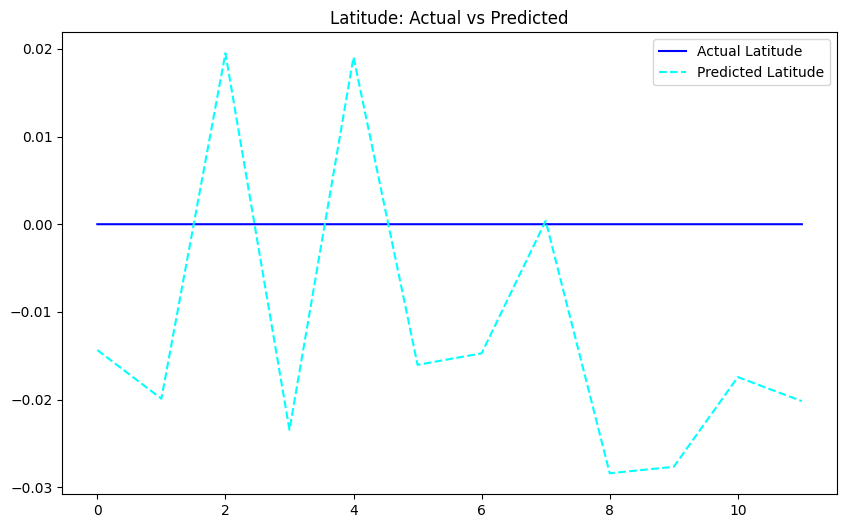

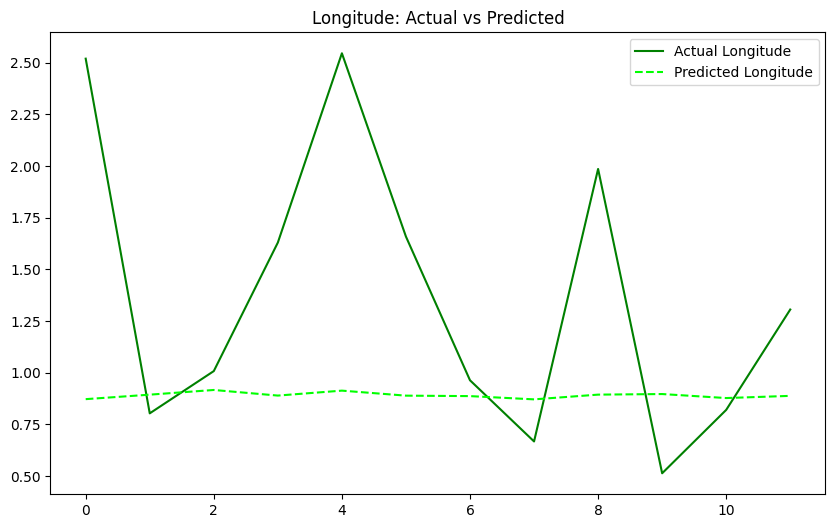

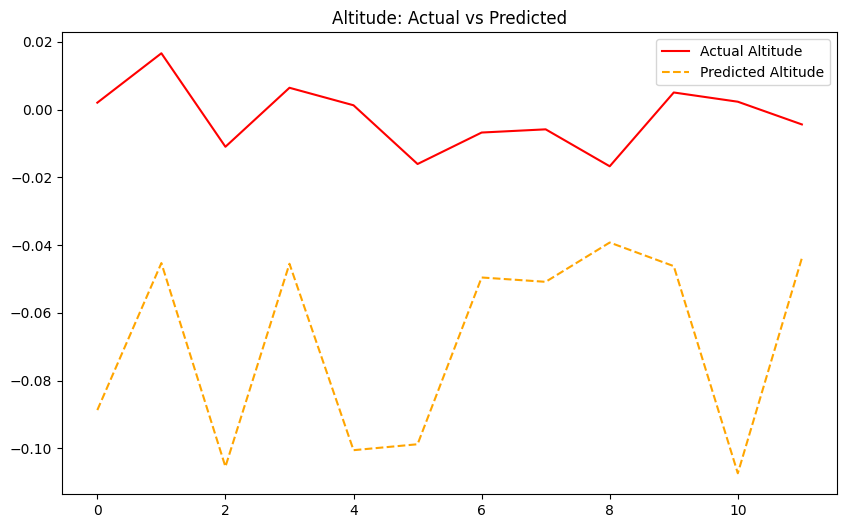

In [ ]:
import matplotlib.pyplot as plt

# Predict the test set
y_pred = model.predict(X_test)
y_pred = np.squeeze(y_pred)
# Compare predictions with ground truth
print("Predicted values:", y_pred[:5])  # First 5 predictions
print("Actual values:", y_test[:5])    # First 5 ground truth values

# Plotting predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 0], label="Actual Latitude", color='blue')  # Latitude
plt.plot(y_pred[:, 0], label="Predicted Latitude", color='cyan', linestyle='dashed')
plt.title("Latitude: Actual vs Predicted")
plt.legend()
plt.show()

# Similarly for Longitude and Altitude
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 1], label="Actual Longitude", color='green')  # Longitude
plt.plot(y_pred[:, 1], label="Predicted Longitude", color='lime', linestyle='dashed')
plt.title("Longitude: Actual vs Predicted")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 2], label="Actual Altitude", color='red')  # Altitude
plt.plot(y_pred[:, 2], label="Predicted Altitude", color='orange', linestyle='dashed')
plt.title("Altitude: Actual vs Predicted")
plt.legend()
plt.show()